In [2]:
import pandas as pd
from psychometric import PsychometricFit
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import sem
import seaborn as sns

In [3]:
aversive_zpsize_avg = pd.read_csv('Data/fig_1_2_3/aversive_pupil_zscore.csv',header=[0,1],index_col=[0])
aversive_zpsize_avg.columns = aversive_zpsize_avg.columns.map(lambda x: tuple(map(int, x)))
aversive_vel1_avg = pd.read_csv('Data/fig_1_2_3/aversive_vel_zscore.csv',header=[0,1],index_col=[0])
aversive_vel1_avg.columns = aversive_vel1_avg.columns.map(lambda x: tuple(map(int, x)))
#aversive_sub_folder = pd.read_csv('Data/aversive_sub_folder.csv')

aversive_zpsize_avg_diff = (aversive_zpsize_avg.T - aversive_zpsize_avg.xs(0,level=1,axis=1).mean(axis=1).T).T
aversive_vel1_avg_diff = (aversive_vel1_avg.T - aversive_vel1_avg.xs(0,level=1,axis=1).mean(axis=1).T).T

eco_zpsize_avg = pd.read_csv('Data/fig_1_2_3/eco_pupil_zscore.csv',header=[0,1],index_col=[0])
eco_zpsize_avg.columns = eco_zpsize_avg.columns.map(lambda x: tuple(map(int, x)))
sub_folder = pd.read_csv('Data/aversive_sub_folder.csv')
eco_zpsize_avg_diff = (eco_zpsize_avg.T - eco_zpsize_avg.xs(0,level=1,axis=1).mean(axis=1).T).T

aversive_zpsize_avg_pnt = aversive_zpsize_avg_diff.loc[0:].mean().unstack()
aversive_vel1_avg_pnt = aversive_vel1_avg_diff.loc[0:].mean().unstack()
eco_zpsize_avg_pnt = eco_zpsize_avg_diff.loc[0:].mean().unstack()


msize = 3
fit_res = list()
for i in range(aversive_zpsize_avg_pnt.shape[0]):
    print(i,end=';')
    ladder = aversive_zpsize_avg_pnt.loc[i,:]
    x_values = (np.array([0,50,150,300,500])/500)
    y_values = (ladder.values-ladder.values[0])/np.max(ladder.values-ladder.values[0])
    psych_aversive_zpsize = PsychometricFit()
    psych_aversive_zpsize.fit(x_values,y_values)

    ladder = aversive_vel1_avg_pnt.loc[i,:]
    x_values = (np.array([0,50,150,300,500])/500)
    y_values = (ladder.values-ladder.values[0])/np.max(ladder.values-ladder.values[0])
    psych_aversive_vel1 = PsychometricFit()
    psych_aversive_vel1.fit(x_values,y_values)


    ladder = eco_zpsize_avg_pnt.loc[i,:]
    x_values = (np.array([0,50,150,300,500])/500)
    y_values = (ladder.values-ladder.values[0])/np.max(ladder.values-ladder.values[0])
    psych_eco_zpsize = PsychometricFit()
    psych_eco_zpsize.fit(x_values,y_values)

    temp = pd.concat([psych_aversive_zpsize.summary_dataframe().add_prefix('pp_'),
                      psych_aversive_vel1.summary_dataframe().add_prefix('pv_'),
                      psych_eco_zpsize.summary_dataframe().add_prefix('ep_')],axis=1)
    temp.index=[i]
    fit_res.append(temp)

fit_res = pd.concat(fit_res)

rev_sub = {v:k for v,k in sub_folder['sub'].items()}
fit_res.insert(0,'sub',[rev_sub[i] for i in fit_res.index])
#fit_res = fit_res.set_index('sub')


0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;

## Fig. 6  B C

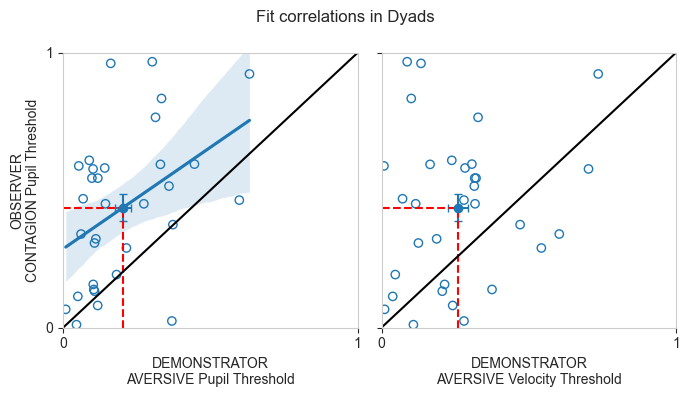

In [4]:
couples = pd.read_excel('Data/couples_all.xlsx')
couples_num = [(sub_folder[sub_folder['sub']==row.Observer]['0'].values[0], sub_folder[sub_folder['sub']==row.Demonstrator]['0'].values[0]) for i,row in couples.iterrows()]

fig,ax = plt.subplots(1,2,figsize=(7,4),sharey=True,sharex=True)
fig.suptitle('Fit correlations in Dyads')

r2_thresh = -1
corrs = list()
couple_amps_pupi = np.array([(fit_res.loc[o,'pp_threshold'],
                              fit_res.loc[d,'ep_threshold'])
                             for o,d in couples_num if fit_res.loc[o,'ep_r_squared']>r2_thresh ])
ax[0].scatter(couple_amps_pupi[:,0],couple_amps_pupi[:,1],edgecolor='tab:blue', facecolor='none')
ax[0].errorbar(couple_amps_pupi[:,0].mean(), couple_amps_pupi[:,1].mean(), xerr=sem(couple_amps_pupi[:,0]),yerr=sem(couple_amps_pupi[:,1]), fmt='o', capsize=3)
ax[0].vlines(x=couple_amps_pupi[:,0].mean(), ymin=0, ymax=couple_amps_pupi[:,1].mean(), colors='red', linestyles='--', label='Vertical Line')
ax[0].hlines(y=couple_amps_pupi[:,1].mean(), xmin=0, xmax=couple_amps_pupi[:,0].mean(), colors='red', linestyles='--', label='Vertical Line')
sns.regplot(x=couple_amps_pupi[:,0], y=couple_amps_pupi[:,1], ax=ax[0], scatter=False, color='tab:blue', line_kws={'label': 'Linear fit'})

ax[0].axline((1, 1), slope=1,color='k', linestyle='-')
ax[0].set_ylabel('OBSERVER\nCONTAGION Pupil Threshold')
ax[0].set_xlabel('DEMONSTRATOR\nAVERSIVE Pupil Threshold')
ax[1].set_xlabel('DEMONSTRATOR\nAVERSIVE Velocity Threshold')
sta_temp = pg.corr(couple_amps_pupi[:,0],couple_amps_pupi[:,1],method='spearman')
sta_temp['what'] = 'pupil'
corrs.append( sta_temp )

couple_amps_loco = np.array([(fit_res.loc[o,'pv_threshold'],
                              fit_res.loc[d,'ep_threshold'])
                             for o,d in couples_num if fit_res.loc[o,'ep_r_squared']>r2_thresh ])
ax[1].scatter(couple_amps_loco[:,0],couple_amps_loco[:,1],edgecolor='tab:blue', facecolor='none')
ax[1].errorbar(couple_amps_loco[:,0].mean(), couple_amps_loco[:,1].mean(), xerr=sem(couple_amps_loco[:,0]),yerr=sem(couple_amps_loco[:,1]), fmt='o', capsize=3)
ax[1].vlines(x=couple_amps_loco[:,0].mean(), ymin=0, ymax=couple_amps_loco[:,1].mean(), colors='red', linestyles='--', label='Vertical Line')
ax[1].hlines(y=couple_amps_loco[:,1].mean(), xmin=0, xmax=couple_amps_loco[:,0].mean(), colors='red', linestyles='--', label='Vertical Line')
ax[1].axline((1, 1), slope=1,color='k', linestyle='-')
ax[0].grid(False)
ax[1].grid(False)
ax[1].set_ylim([0,1])
ax[1].set_xlim([0,1])

ax[0].tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
ax[1].tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

ax[0].set_xticks([0,1])
ax[0].set_yticks([0,1])
ax[1].set_xticks([0,1])
ax[1].set_yticks([0,1])

plt.tight_layout()

sta_temp = pg.corr(couple_amps_loco[:,0],couple_amps_loco[:,1],method='spearman')
sta_temp['what'] = 'velocity'
corrs.append( sta_temp )

corrs = pd.concat(corrs)

## Fig. 6 D

In [5]:
observer = pd.read_excel('Data/areas_observer_density.xlsx')
name2acro = {row['name'].lower():row['acronym'] for i,row in observer.iterrows()}
acro2col = {row['acronym']:row['struct_color'] for i,row in observer.iterrows()}

db = pd.read_csv("Data/dyads_shared_results_pval.csv")
db['Areas Name'] = db['Areas Name'].apply(lambda x:x.replace("'","").strip())
db['acronym'] = db['Areas Name'].apply(lambda x: name2acro[x.lower()] if x.lower() != 'superior colliculus sensory related' else 'SCs' )
db.index = db['acronym'].values
db = db.drop(['Areas Name','acronym'],axis=1)
db_signi = db[db['pVal_Correlation']<0.05]

dems = db[db.columns[[col.startswith('Demo') for col in db.columns]]]
obs =  db[db.columns[[col.startswith('Obs') for col in db.columns]]]

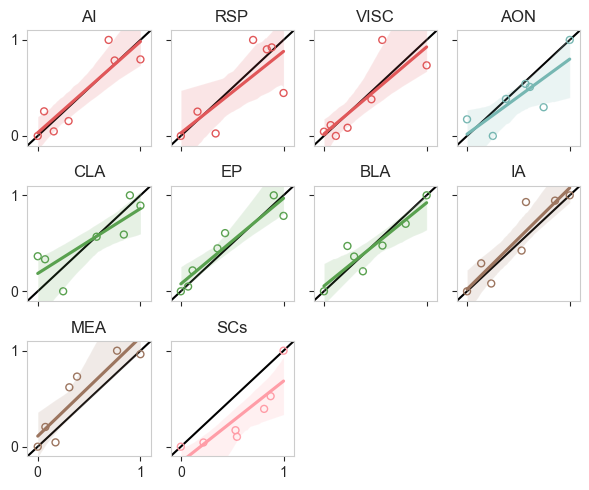

In [6]:
fig,ax = plt.subplots(3,4,sharex=True,sharey=True,figsize=(6,5))

r=0
c=0
for i,area in enumerate(dems.index):
    x = (dems.loc[area,:]-dems.loc[area,:].min())/(dems.loc[area,:].max()-dems.loc[area,:].min())
    y = (obs.loc[area,:]-obs.loc[area,:].min())/(obs.loc[area,:].max()-obs.loc[area,:].min())
    ax[r,c].axline((1, 1), slope=1,color='k', linestyle='-',zorder=0)
    ax[r,c].scatter(x,y,marker='o',s=25,edgecolor=acro2col[area], facecolor='none')
    sns.regplot(x=x, y=y, ax=ax[r,c], scatter=False, color=acro2col[area], line_kws={'label': 'Linear fit'})

    ax[r,c].grid(False)
    ax[r,c].set_title(area)

    ax[r,c].set_xlabel('')
    ax[r,c].set_ylabel('')
    ax[r,c].set_xlim([-0.1,1.1])
    ax[r,c].set_ylim([-0.1,1.1])
    ax[r,c].set_xticks([0,1])
    ax[r,c].set_yticks([0,1])
    ax[r,c].tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
    #print('{}:{}'.format(area,db.loc[area,'Corr_Coeff']))
    if c>=ax.shape[1]-1:
        c=0
        r+=1
    else:
        c+=1

fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])

plt.tight_layout()